In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
pd.set_option("display.max_rows", 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# 1. Clean unlabeled reports

In [4]:
# Load data
df_unlabeled = pd.read_excel('data/raw/eikon_reports_unlabeled.xlsx', engine='openpyxl')
df_unlabeled

,Identifier,Company_Name,Country_of_Exchange,CSR_Period_Absolute,CSR_Period_Relative,CSR_Title,CSR_URL
0,.ONECAD,NaN,NaN,NaN,NaN,NaN,NaN
1,BCE_py.TO,BCE Inc,Canada,FY2020,FY0,00 Purpose and Corporate Responsibility Report,https://www.bce.ca/responsibility/overview/2020-cr-report.pdf
...,...,...,...,...,...,...,...
45268,BCG.L,Baltic Classifieds Group PLC,United Kingdom,NaN,NaN,NaN,NaN
45269,BPTB.L,Bridgepoint Group PLC,United Kingdom,NaN,NaN,NaN,NaN


In [5]:
# Clean data
# Remove companies without URLs
df_unlabeled_clean = df_unlabeled[~df_unlabeled['CSR_URL'].isna()]
# Remove duplicates based on URL
df_unlabeled_clean = df_unlabeled_clean.drop_duplicates(['CSR_URL'], keep='first').reset_index(drop=True)

In [6]:
# Select relevant columns
df_unlabeled_clean = df_unlabeled_clean[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'CSR_URL']]
df_unlabeled_clean

,Identifier,Company_Name,CSR_Period_Relative,CSR_Period_Absolute,CSR_URL
0,BCE_py.TO,BCE Inc,FY0,FY2020,https://www.bce.ca/responsibility/overview/2020-cr-report.pdf
1,ENB_pa.TO,Enbridge Inc,FY0,FY2020,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf
...,...,...,...,...,...
12960,FLTRF.L,Flutter Entertainment PLC,FY-9,FY2011,http://www.paddypowerplc.com/uploads/documents/annualreport2011.pdf
12961,TUIT.L,TUI AG,FY-9,FY2010,http://www.tui-group.com/dms/ir/20_annual_report_2009-10/pdfs/TUI_AR_2009-10_en/TUI_AR_2009-10_en.pdf


# 2. Clean labeled reports

In [7]:
# Load data
df_labeled = pd.read_excel('data/raw/eikon_reports_labeled.xlsx', engine='openpyxl')
df_labeled

,Identifier,Company_Name,Country_of_Exchange,CSR_Period_Absolute,CSR_Title,CSR_URL,CSR_Reporting,SDG1_Page_1,SDG1_Page_2,SDG1_Title_1,SDG1_Title_2,SDG1_URL_1,SDG1_URL_2,SDG1,SDG2_Page_1,SDG2_Page_2,SDG2_Title_1,SDG2_Title_2,SDG2_URL_1,SDG2_URL_2,SDG2,SDG3_Page_1,SDG3_Page_2,SDG3_Title_1,SDG3_Title_2,SDG3_URL_1,SDG3_URL_2,SDG3,SDG4_Page_1,SDG4_Page_2,SDG4_Title_1,SDG4_Title_2,SDG4_URL_1,SDG4_URL_2,SDG4,SDG5_Page_1,SDG5_Page_2,SDG5_Title_1,SDG5_Title_2,SDG5_URL_1,SDG5_URL_2,SDG5,SDG6_Page_1,SDG6_Page_2,SDG6_Title_1,SDG6_Title_2,SDG6_URL_1,SDG6_URL_2,SDG6,SDG7_Page_1,SDG7_Page_2,SDG7_Title_1,SDG7_Title_2,SDG7_URL_1,SDG7_URL_2,SDG7,SDG8_Page_1,SDG8_Page_2,SDG8_Title_1,SDG8_Title_2,SDG8_URL_1,SDG8_URL_2,SDG8,SDG9_Page_1,SDG9_Page_2,SDG9_Title_1,SDG9_Title_2,SDG9_URL_1,SDG9_URL_2,SDG9,SDG10_Page_1,SDG10_Page_2,SDG10_Title_1,SDG10_Title_2,SDG10_URL_1,SDG10_URL_2,SDG10,SDG11_Page_1,SDG11_Page_2,SDG11_Title_1,SDG11_Title_2,SDG11_URL_1,SDG11_URL_2,SDG11,SDG12_Page_1,SDG12_Page_2,SDG12_Title_1,SDG12_Title_2,SDG12_URL_1,SDG12_URL_2,SDG12,SDG13_Page_1,SDG13_Page_2,SDG13_Title_1,SDG13_Title_2,SDG13_URL_1,SDG13_URL_2,SDG13,SDG14_Page_1,SDG14_Page_2,SDG14_Title_1,SDG14_Title_2,SDG14_URL_1,SDG14_URL_2,SDG14,SDG15_Page_1,SDG15_Page_2,SDG15_Title_1,SDG15_Title_2,SDG15_URL_1,SDG15_URL_2,SDG15,SDG16_Page_1,SDG16_Page_2,SDG16_Title_1,SDG16_Title_2,SDG16_URL_1,SDG16_URL_2,SDG16,SDG17_Page_1,SDG17_Page_2,SDG17_Title_1,SDG17_Title_2,SDG17_URL_1,SDG17_URL_2,SDG17,CSR_Period_Relative
0,408680426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FY0
1,.ONECAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FY0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8952,TRST.L,Trustpilot Group PLC,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FY-1
8953,WIX.L,Wickes Group PLC,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
# Clean data
# Remove companies without SDG labels
df_labeled_clean = df_labeled[~df_labeled['SDG1'].isna()]
# Remove duplicates based on URL
df_labeled_clean = df_labeled_clean.drop_duplicates(['CSR_URL'], keep='first').reset_index(drop=True)
df_labeled_clean

,Identifier,Company_Name,Country_of_Exchange,CSR_Period_Absolute,CSR_Title,CSR_URL,CSR_Reporting,SDG1_Page_1,SDG1_Page_2,SDG1_Title_1,SDG1_Title_2,SDG1_URL_1,SDG1_URL_2,SDG1,SDG2_Page_1,SDG2_Page_2,SDG2_Title_1,SDG2_Title_2,SDG2_URL_1,SDG2_URL_2,SDG2,SDG3_Page_1,SDG3_Page_2,SDG3_Title_1,SDG3_Title_2,SDG3_URL_1,SDG3_URL_2,SDG3,SDG4_Page_1,SDG4_Page_2,SDG4_Title_1,SDG4_Title_2,SDG4_URL_1,SDG4_URL_2,SDG4,SDG5_Page_1,SDG5_Page_2,SDG5_Title_1,SDG5_Title_2,SDG5_URL_1,SDG5_URL_2,SDG5,SDG6_Page_1,SDG6_Page_2,SDG6_Title_1,SDG6_Title_2,SDG6_URL_1,SDG6_URL_2,SDG6,SDG7_Page_1,SDG7_Page_2,SDG7_Title_1,SDG7_Title_2,SDG7_URL_1,SDG7_URL_2,SDG7,SDG8_Page_1,SDG8_Page_2,SDG8_Title_1,SDG8_Title_2,SDG8_URL_1,SDG8_URL_2,SDG8,SDG9_Page_1,SDG9_Page_2,SDG9_Title_1,SDG9_Title_2,SDG9_URL_1,SDG9_URL_2,SDG9,SDG10_Page_1,SDG10_Page_2,SDG10_Title_1,SDG10_Title_2,SDG10_URL_1,SDG10_URL_2,SDG10,SDG11_Page_1,SDG11_Page_2,SDG11_Title_1,SDG11_Title_2,SDG11_URL_1,SDG11_URL_2,SDG11,SDG12_Page_1,SDG12_Page_2,SDG12_Title_1,SDG12_Title_2,SDG12_URL_1,SDG12_URL_2,SDG12,SDG13_Page_1,SDG13_Page_2,SDG13_Title_1,SDG13_Title_2,SDG13_URL_1,SDG13_URL_2,SDG13,SDG14_Page_1,SDG14_Page_2,SDG14_Title_1,SDG14_Title_2,SDG14_URL_1,SDG14_URL_2,SDG14,SDG15_Page_1,SDG15_Page_2,SDG15_Title_1,SDG15_Title_2,SDG15_URL_1,SDG15_URL_2,SDG15,SDG16_Page_1,SDG16_Page_2,SDG16_Title_1,SDG16_Title_2,SDG16_URL_1,SDG16_URL_2,SDG16,SDG17_Page_1,SDG17_Page_2,SDG17_Title_1,SDG17_Title_2,SDG17_URL_1,SDG17_URL_2,SDG17,CSR_Period_Relative
0,BCE_py.TO,BCE Inc,Canada,FY2020,2020 Purpose and Corporate Responsibility Report,https://www.bce.ca/responsibility/overview/2020-cr-report.pdf,1.0,3,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,3,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,3,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,3,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,4,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,4,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,4,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,5,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,6,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,6,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,6,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,7,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,7,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,7,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,7,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,8,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,8,NaN,2020 Sustainable Development Goals (SDG) Content Index,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.p

## 2.1. Extract potential test data (full reports with labels)

In [9]:
# Remove companies without CSR
df_labeled_reports = df_labeled_clean[~df_labeled_clean['CSR_URL'].isna()][['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'CSR_URL', 'SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6', 'SDG7', 'SDG8', 'SDG9', 'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15', 'SDG16', 'SDG17']]
df_labeled_reports

,Identifier,Company_Name,CSR_Period_Relative,CSR_Period_Absolute,CSR_URL,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,BCE_py.TO,BCE Inc,FY0,FY2020,https://www.bce.ca/responsibility/overview/2020-cr-report.pdf,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,ENB_pa.TO,Enbridge Inc,FY0,FY2020,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,TUIT.L,Tui AG,FY-1,FY2018,https://www.tuigroup.com/damfiles/default/tuigroup-15/de/nachhaltigkeit/berichterstattung-downloads/2019/nachhaltigkeitsbericht-de-en/TUI_CSR18_EN.pdf-5940a155fe7c4eb56170bf97e3b69ec6.pdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4312,VEILV.L,Vietnam Enterprise Investments Limited,FY-1,FY2019,https://www.veil-dragoncapital.com/wp-content/uploads/2020/04/VEIL-AR-2019.pdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.2. Extract potential training data (report pages with labels)

### Explore data

# companies with at least one SDG = True: 1177
# companies with all SDG = False: 3136


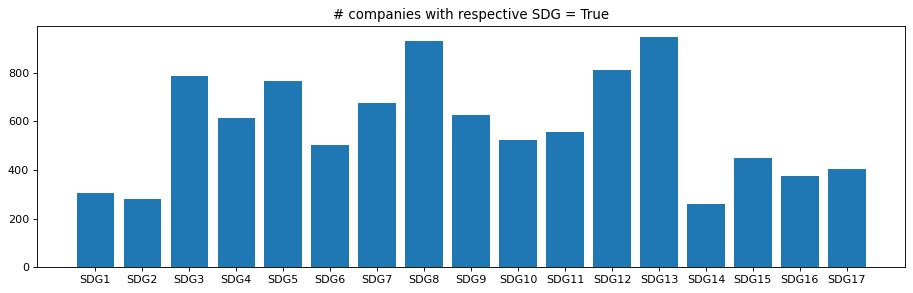

# positive labels: 9809


In [10]:
# Companies with at least one SDG = True
df_positive_label = df_labeled_clean[(df_labeled_clean['SDG1'] == True) | (df_labeled_clean['SDG2'] == True) | (df_labeled_clean['SDG3'] == True) | (df_labeled_clean['SDG4'] == True) | (df_labeled_clean['SDG5'] == True) | (df_labeled_clean['SDG6'] == True) | (df_labeled_clean['SDG7'] == True) | (df_labeled_clean['SDG8'] == True) | (df_labeled_clean['SDG9'] == True) | (df_labeled_clean['SDG10'] == True) | (df_labeled_clean['SDG11'] == True) | (df_labeled_clean['SDG12'] == True) | (df_labeled_clean['SDG13'] == True) | (df_labeled_clean['SDG14'] == True) | (df_labeled_clean['SDG15'] == True) | (df_labeled_clean['SDG16'] == True) | (df_labeled_clean['SDG17'] == True)].reset_index(drop=True)
print('# companies with at least one SDG = True: '+ str(len(df_positive_label)))

# Companies that align to no SDG
df_negative_label = pd.concat([df_labeled_clean,df_positive_label]).drop_duplicates(keep=False).reset_index(drop=True)
print('# companies with all SDG = False: ' + str(len(df_negative_label)))

# Number of positive examples for each sdg
list1 = []
list2 = []
for i in range(1,18):
    sdg = 'SDG'+ str(i)
    list1.append(sdg)
    list2.append(sum(df_labeled_clean[sdg] == True))
figure(figsize=(14, 4), dpi=80)
plt.bar(list1, list2)
plt.title('# companies with respective SDG = True')
plt.show()

# Total number of positive labels
print('# positive labels: ' + str(sum(list2)))

### Extract potential training data
- For some SDG labels, the source with the corresponding page number is given
- Due to the nature of the dataset, (manual) preprocessing is required

In [11]:
# Select relevant columns
df_train = df_positive_label[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'CSR_URL', 'SDG1_Page_1', 'SDG1_Page_2', 'SDG1_URL_1', 'SDG1_URL_2', 'SDG1', 'SDG2_Page_1', 'SDG2_Page_2', 'SDG2_URL_1', 'SDG2_URL_2', 'SDG2', 'SDG3_Page_1', 'SDG3_Page_2', 'SDG3_URL_1', 'SDG3_URL_2', 'SDG3', 'SDG4_Page_1', 'SDG4_Page_2', 'SDG4_URL_1', 'SDG4_URL_2', 'SDG4', 'SDG5_Page_1', 'SDG5_Page_2', 'SDG5_URL_1', 'SDG5_URL_2', 'SDG5', 'SDG6_Page_1', 'SDG6_Page_2', 'SDG6_URL_1', 'SDG6_URL_2', 'SDG6', 'SDG7_Page_1', 'SDG7_Page_2', 'SDG7_URL_1', 'SDG7_URL_2', 'SDG7', 'SDG8_Page_1', 'SDG8_Page_2', 'SDG8_URL_1', 'SDG8_URL_2', 'SDG8', 'SDG9_Page_1', 'SDG9_Page_2', 'SDG9_URL_1', 'SDG9_URL_2', 'SDG9', 'SDG10_Page_1', 'SDG10_Page_2', 'SDG10_URL_1', 'SDG10_URL_2', 'SDG10', 'SDG11_Page_1', 'SDG11_Page_2', 'SDG11_URL_1', 'SDG11_URL_2', 'SDG11', 'SDG12_Page_1', 'SDG12_Page_2', 'SDG12_URL_1', 'SDG12_URL_2', 'SDG12', 'SDG13_Page_1', 'SDG13_Page_2', 'SDG13_URL_1', 'SDG13_URL_2', 'SDG13', 'SDG14_Page_1', 'SDG14_Page_2', 'SDG14_URL_1', 'SDG14_URL_2', 'SDG14', 'SDG15_Page_1', 'SDG15_Page_2', 'SDG15_URL_1', 'SDG15_URL_2', 'SDG15', 'SDG16_Page_1', 'SDG16_Page_2', 'SDG16_URL_1', 'SDG16_URL_2', 'SDG16', 'SDG17_Page_1', 'SDG17_Page_2', 'SDG17_URL_1', 'SDG17_URL_2', 'SDG17']]
# Remove companies without any page numbers
df_train = df_train[~df_train['SDG1_Page_1'].isna() | ~df_train['SDG1_Page_2'].isna() | ~df_train['SDG2_Page_1'].isna() | ~df_train['SDG2_Page_2'].isna() | ~df_train['SDG3_Page_1'].isna() | ~df_train['SDG3_Page_2'].isna() | ~df_train['SDG4_Page_1'].isna() | ~df_train['SDG4_Page_2'].isna() | ~df_train['SDG5_Page_1'].isna() | ~df_train['SDG5_Page_2'].isna() | ~df_train['SDG6_Page_1'].isna() | ~df_train['SDG6_Page_2'].isna() | ~df_train['SDG7_Page_1'].isna() | ~df_train['SDG7_Page_2'].isna() | ~df_train['SDG8_Page_1'].isna() | ~df_train['SDG8_Page_2'].isna() | ~df_train['SDG9_Page_1'].isna() | ~df_train['SDG9_Page_2'].isna() | ~df_train['SDG10_Page_1'].isna() | ~df_train['SDG10_Page_2'].isna() | ~df_train['SDG11_Page_1'].isna() | ~df_train['SDG11_Page_2'].isna() | ~df_train['SDG12_Page_1'].isna() | ~df_train['SDG12_Page_2'].isna() | ~df_train['SDG13_Page_1'].isna() | ~df_train['SDG13_Page_2'].isna() | ~df_train['SDG14_Page_1'].isna() | ~df_train['SDG14_Page_2'].isna() | ~df_train['SDG15_Page_1'].isna() | ~df_train['SDG15_Page_2'].isna() | ~df_train['SDG16_Page_1'].isna() | ~df_train['SDG16_Page_2'].isna() | ~df_train['SDG17_Page_1'].isna() | ~df_train['SDG17_Page_2'].isna()].reset_index(drop=True)
df_train

,Identifier,Company_Name,CSR_Period_Relative,CSR_Period_Absolute,CSR_URL,SDG1_Page_1,SDG1_Page_2,SDG1_URL_1,SDG1_URL_2,SDG1,SDG2_Page_1,SDG2_Page_2,SDG2_URL_1,SDG2_URL_2,SDG2,SDG3_Page_1,SDG3_Page_2,SDG3_URL_1,SDG3_URL_2,SDG3,SDG4_Page_1,SDG4_Page_2,SDG4_URL_1,SDG4_URL_2,SDG4,SDG5_Page_1,SDG5_Page_2,SDG5_URL_1,SDG5_URL_2,SDG5,SDG6_Page_1,SDG6_Page_2,SDG6_URL_1,SDG6_URL_2,SDG6,SDG7_Page_1,SDG7_Page_2,SDG7_URL_1,SDG7_URL_2,SDG7,SDG8_Page_1,SDG8_Page_2,SDG8_URL_1,SDG8_URL_2,SDG8,SDG9_Page_1,SDG9_Page_2,SDG9_URL_1,SDG9_URL_2,SDG9,SDG10_Page_1,SDG10_Page_2,SDG10_URL_1,SDG10_URL_2,SDG10,SDG11_Page_1,SDG11_Page_2,SDG11_URL_1,SDG11_URL_2,SDG11,SDG12_Page_1,SDG12_Page_2,SDG12_URL_1,SDG12_URL_2,SDG12,SDG13_Page_1,SDG13_Page_2,SDG13_URL_1,SDG13_URL_2,SDG13,SDG14_Page_1,SDG14_Page_2,SDG14_URL_1,SDG14_URL_2,SDG14,SDG15_Page_1,SDG15_Page_2,SDG15_URL_1,SDG15_URL_2,SDG15,SDG16_Page_1,SDG16_Page_2,SDG16_URL_1,SDG16_URL_2,SDG16,SDG17_Page_1,SDG17_Page_2,SDG17_URL_1,SDG17_URL_2,SDG17
0,BCE_py.TO,BCE Inc,FY0,FY2020,https://www.bce.ca/responsibility/overview/2020-cr-report.pdf,3,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,3,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,3,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,3,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,4,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,4,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,4,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,5,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,6,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,6,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,6,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,7,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,7,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,7,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,7,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,8,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0,8,NaN,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,NaN,1.0
1,ENB_pa.TO,Enbridge Inc,FY0,FY2020,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,"14,34",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,NaN,1.0,NaN,NaN,NaN,NaN,0.0,"14,44",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,NaN,1.0,"14,34",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,NaN,1.0,"14,44",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,NaN,1.0,"14,19",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,NaN,1.0,"14,19",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,NaN,1.0,"14,28",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,NaN,1.0,"14,19",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,NaN,1.0,"14,44",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,NaN,1.0,NaN,NaN,NaN,NaN,0.0,"14,34",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,NaN,1.0,"14,19",NaN,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020

### Modify df to handle multiple sources for each label (needs to be done manually)

In [12]:
# Select companies with multiple URLs
df_train_second_url = df_train[~df_train['SDG1_URL_2'].isna() | ~df_train['SDG2_URL_2'].isna() | ~df_train['SDG3_URL_2'].isna() | ~df_train['SDG4_URL_2'].isna() | ~df_train['SDG5_URL_2'].isna() | ~df_train['SDG6_URL_2'].isna() | ~df_train['SDG7_URL_2'].isna() | ~df_train['SDG8_URL_2'].isna() | ~df_train['SDG9_URL_2'].isna() | ~df_train['SDG10_URL_2'].isna() | ~df_train['SDG11_URL_2'].isna() | ~df_train['SDG12_URL_2'].isna() | ~df_train['SDG13_URL_2'].isna() | ~df_train['SDG14_URL_2'].isna() | ~df_train['SDG15_URL_2'].isna() | ~df_train['SDG16_URL_2'].isna() | ~df_train['SDG17_URL_2'].isna()]
# Remove companies for which each page number for the second URL is missing
df_train_second_url = df_train_second_url[~df_train_second_url['SDG1_Page_1'].isna() | ~df_train_second_url['SDG2_Page_1'].isna() | ~df_train_second_url['SDG3_Page_1'].isna() | ~df_train_second_url['SDG4_Page_1'].isna() | ~df_train_second_url['SDG5_Page_1'].isna() | ~df_train_second_url['SDG6_Page_1'].isna() | ~df_train_second_url['SDG7_Page_1'].isna() | ~df_train_second_url['SDG8_Page_1'].isna() | ~df_train_second_url['SDG9_Page_1'].isna() | ~df_train_second_url['SDG10_Page_1'].isna() | ~df_train_second_url['SDG11_Page_1'].isna() | ~df_train_second_url['SDG12_Page_1'].isna() | ~df_train_second_url['SDG13_Page_1'].isna() | ~df_train_second_url['SDG14_Page_1'].isna() | ~df_train_second_url['SDG15_Page_1'].isna() | ~df_train_second_url['SDG16_Page_1'].isna() | ~df_train_second_url['SDG17_Page_1'].isna()]
df_train_second_url

,Identifier,Company_Name,CSR_Period_Relative,CSR_Period_Absolute,CSR_URL,SDG1_Page_1,SDG1_Page_2,SDG1_URL_1,SDG1_URL_2,SDG1,SDG2_Page_1,SDG2_Page_2,SDG2_URL_1,SDG2_URL_2,SDG2,SDG3_Page_1,SDG3_Page_2,SDG3_URL_1,SDG3_URL_2,SDG3,SDG4_Page_1,SDG4_Page_2,SDG4_URL_1,SDG4_URL_2,SDG4,SDG5_Page_1,SDG5_Page_2,SDG5_URL_1,SDG5_URL_2,SDG5,SDG6_Page_1,SDG6_Page_2,SDG6_URL_1,SDG6_URL_2,SDG6,SDG7_Page_1,SDG7_Page_2,SDG7_URL_1,SDG7_URL_2,SDG7,SDG8_Page_1,SDG8_Page_2,SDG8_URL_1,SDG8_URL_2,SDG8,SDG9_Page_1,SDG9_Page_2,SDG9_URL_1,SDG9_URL_2,SDG9,SDG10_Page_1,SDG10_Page_2,SDG10_URL_1,SDG10_URL_2,SDG10,SDG11_Page_1,SDG11_Page_2,SDG11_URL_1,SDG11_URL_2,SDG11,SDG12_Page_1,SDG12_Page_2,SDG12_URL_1,SDG12_URL_2,SDG12,SDG13_Page_1,SDG13_Page_2,SDG13_URL_1,SDG13_URL_2,SDG13,SDG14_Page_1,SDG14_Page_2,SDG14_URL_1,SDG14_URL_2,SDG14,SDG15_Page_1,SDG15_Page_2,SDG15_URL_1,SDG15_URL_2,SDG15,SDG16_Page_1,SDG16_Page_2,SDG16_URL_1,SDG16_URL_2,SDG16,SDG17_Page_1,SDG17_Page_2,SDG17_URL_1,SDG17_URL_2,SDG17
42,AVT.OQ,Avnet Inc,FY0,FY2020,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,22,NaN,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,NaN,1.0,NaN,NaN,NaN,NaN,0.0,22,NaN,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,NaN,1.0,NaN,NaN,NaN,NaN,0.0,22,NaN,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,22,NaN,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,NaN,1.0,NaN,NaN,NaN,NaN,0.0,22,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
70,TAP.N,Molson Coors Beverage Co,FY0,FY2020,https://www.molsoncoors.com/sites/molsonco/files/ESG-Report-2021-EN.pdf,NaN,NaN,NaN,NaN,0.0,"2,3",NaN,https://www.molsoncoors.com/sites/molsonco/files/SDG-Report-2021-EN.pdf,NaN,1.0,"3,4",NaN,https://www.molsoncoors.com/sites/molsonco/files/SDG-Report-2021-EN.pdf,NaN,1.0,NaN,NaN,NaN,NaN,0.0,"2,5",NaN,https://www.molsoncoors.com/sites/molsonco/files/SDG-Report-2021-EN.pdf,NaN,1.0,"2,7",NaN,https://www.molsoncoors.com/sites/molsonco/files/SDG-Report-2021-EN.pdf,NaN,1.0,"2,8",NaN,https://www.molsoncoors.com/sites/molsonco/files/SDG-Report-2021-EN.pdf,NaN,1.0,"2,",NaN,https://www.molsoncoors.com/sites/molsonco/files/SDG-Report-2021-EN.pdf,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,"2,","2,",https://www.molsoncoors.com/sites/molsonco/files/SDG-Report-2021-EN.pdf,https://www.molsoncoors.com/sites/molsonco/files/SDG-Report-2021-EN.pdf,1.0,"2,10",NaN,https://www.molsoncoors.com/sites/molsonco/files/SDG-Report-2021-EN.pdf,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,"2,11",NaN,https://www.molsoncoors.com/sites/molsonco/files/SDG-Report-2021-EN.pdf,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [13]:
pd.set_option('display.max_columns', None)
# For each row:
# Select only columns that are non NaN (for easier assessment) and evaluate what needs to be done
df_train_second_url.iloc[0:1][df_train_second_url.iloc[0:1].columns[~df_train_second_url.iloc[0:1].isnull().all()]]

,Identifier,Company_Name,CSR_Period_Relative,CSR_Period_Absolute,CSR_URL,SDG1_Page_1,SDG1_URL_1,SDG1,SDG2,SDG3_Page_1,SDG3_URL_1,SDG3,SDG4,SDG5_Page_1,SDG5_URL_1,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13_Page_1,SDG13_URL_1,SDG13,SDG14,SDG15_Page_1,SDG15_Page_2,SDG15_URL_1,SDG15_URL_2,SDG15,SDG16,SDG17
42,AVT.OQ,Avnet Inc,FY0,FY2020,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,0.0,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,0.0,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,0.0,22,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,0.0,0.0


#### Findings:

- Identifiers for which the second column can be removed (nothing needs to be done):
    - AVT.OQ
    - TAP.N
    - HPQ.N
    - MDLZ.OQ
    - TMHC.N
    - COMM.OQ
    - NGD.TO
    - VET.TO
    - EDV.TO
- Identifiers which can be handled easily:
    - ETN.N: replace SDG12_Page_1 by 2, URL is the same
    - ZTS.N: replace SDG3_Page_1 by 2, URL is the same
    - BXB.AX: replace SDG6_Page_1 by 2, URL is the same
    - RHC.AX: replace SDG8_Page_1 by 2, URL is the same
    - TLS.AX: replace SDG8_Page_1 by 2, URL is the same
    - CWY.AX: replace SDG5_Page_1 and SDG5_URL_1 by 2
    - IPO.L: replace SDG12_Page_1 and SDG12_URL_1 by 2
    - BDX.N: remove SDG3_Page_1 and SDG3_URL_1 by 2
    - BGA.AX: add SDG12_Page_2 to SDG12_Page_1, URL is the same
    - AC.TO: add SDG8_Page_2 to SDG8_Page_1, URL is the same
    - FSJ.L: add SDG5_Page_2 to SDG5_Page_1, URL is the same
    - CRDA.L: add SDG14_Page_2 to SDG14_Page_1, URL is the same
    - LIN.N: add part (',11') of SDG8_Page_2 to SDG8_Page_1, URL is the same
- Identifiers which have to assessed in more detail:
    - DOC.N: replace pages and URL for SDG3_Page_1 and SDG4_Page_1 by 2
    - DE.N: replace pages and URL for SDG9_Page_1 by 2
    - AQUA.N: replace first pages and URL for SDG3
    - MTO.L: replace first pages and URL for SDG 2,6,8,11,12,13,14,15,16 by 2
    - TUIT.L: replace first pages and URL for SDG 4,7,8,14,17 by 2
    - VET.TO: replace first pages and URL for SDG 6,8,9,12,14,17 by 2 (use idx)

In [14]:
# Modify df based on findings described above

# Identifiers which can be handled easily
df_train_second_url.loc[df_train_second_url['Identifier'] == 'ETN.N', 'SDG12_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'ETN.N', 'SDG12_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'ZTS.N', 'SDG3_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'ZTS.N', 'SDG3_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'BXB.AX', 'SDG6_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'BXB.AX', 'SDG6_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'RHC.AX', 'SDG8_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'RHC.AX', 'SDG8_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TLS.AX', 'SDG8_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TLS.AX', 'SDG8_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'CWY.AX', 'SDG5_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'CWY.AX', 'SDG5_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'CWY.AX', 'SDG5_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'CWY.AX', 'SDG5_URL_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'IPO.L', 'SDG12_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'IPO.L', 'SDG12_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'IPO.L', 'SDG12_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'IPO.L', 'SDG12_URL_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'BDX.N', 'SDG3_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'BDX.N', 'SDG3_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'BDX.N', 'SDG3_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'BDX.N', 'SDG3_URL_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'BGA.AX', 'SDG12_Page_1'] = (df_train_second_url.loc[df_train_second_url['Identifier'] == 'BGA.AX', 'SDG12_Page_1'].astype(str) + ',' + df_train_second_url.loc[df_train_second_url['Identifier'] == 'BGA.AX', 'SDG12_Page_2'].astype(str))
df_train_second_url.loc[df_train_second_url['Identifier'] == 'AC.TO', 'SDG8_Page_1'] = (df_train_second_url.loc[df_train_second_url['Identifier'] == 'AC.TO', 'SDG8_Page_1'].astype(str) + ',' + df_train_second_url.loc[df_train_second_url['Identifier'] == 'AC.TO', 'SDG8_Page_2'].astype(str))
df_train_second_url.loc[df_train_second_url['Identifier'] == 'FSJ.L', 'SDG5_Page_1'] = (df_train_second_url.loc[df_train_second_url['Identifier'] == 'FSJ.L', 'SDG5_Page_1'].astype(str) + ',' + df_train_second_url.loc[df_train_second_url['Identifier'] == 'FSJ.L', 'SDG5_Page_2'].astype(str))
df_train_second_url.loc[df_train_second_url['Identifier'] == 'CRDA.L', 'SDG14_Page_1'] = (df_train_second_url.loc[df_train_second_url['Identifier'] == 'CRDA.L', 'SDG14_Page_1'].astype(str) + ',' + df_train_second_url.loc[df_train_second_url['Identifier'] == 'CRDA.L', 'SDG14_Page_2'].astype(str))
df_train_second_url.loc[df_train_second_url['Identifier'] == 'LIN.N', 'SDG8_Page_1'] = (df_train_second_url.loc[df_train_second_url['Identifier'] == 'LIN.N', 'SDG8_Page_1'].astype(str) + ',11')

#Identifiers which have to be assessed in more detail
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG3_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG3_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG3_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG3_URL_2']                                                                                     
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG4_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG4_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG4_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG4_URL_2']  
                                                                                        
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DE.N', 'SDG9_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DE.N', 'SDG9_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DE.N', 'SDG9_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DE.N', 'SDG9_URL_2'] 
                                                                                        
df_train_second_url.loc[df_train_second_url['Identifier'] == 'AQUA.N', 'SDG3_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'AQUA.N', 'SDG3_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'AQUA.N', 'SDG3_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'AQUA.N', 'SDG3_URL_2']  

df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG2_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG2_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG2_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG2_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG6_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG6_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG6_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG6_URL_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG8_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG8_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG8_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG8_URL_2']                                                                   
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG11_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG11_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG11_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG11_URL_2']                                                                                        
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG12_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG12_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG12_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG12_URL_2']                                                                                          
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG13_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG13_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG13_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG13_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG14_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG14_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG14_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG14_URL_2']    
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG15_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG15_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG15_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG15_URL_2'] 
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG16_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG16_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG16_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG16_URL_2']     

df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG4_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG4_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG4_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG4_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG7_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG7_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG7_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG7_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG8_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG8_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG8_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG8_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG14_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG14_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG14_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG14_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG17_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG17_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG17_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG17_URL_2']  

df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG6_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG6_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG6_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG6_URL_2']        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG8_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG8_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG8_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG8_URL_2']                                                                                          
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG9_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG9_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG9_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG9_URL_2']    
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG12_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG12_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG12_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG12_URL_2']                                                                                          
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG14_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG14_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG14_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG14_URL_2']                                                                                          
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG17_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG17_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG17_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG17_URL_2']                                                                                          

In [15]:
# Update adjusted rows of df_train
df_train.update(df_train_second_url)
# Remove second columns for each SDG
df_train = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'CSR_URL', 'SDG1_Page_1', 'SDG1_URL_1', 'SDG1', 'SDG2_Page_1', 'SDG2_URL_1', 'SDG2', 'SDG3_Page_1', 'SDG3_URL_1', 'SDG3', 'SDG4_Page_1', 'SDG4_URL_1', 'SDG4', 'SDG5_Page_1', 'SDG5_URL_1', 'SDG5', 'SDG6_Page_1', 'SDG6_URL_1', 'SDG6', 'SDG7_Page_1', 'SDG7_URL_1', 'SDG7', 'SDG8_Page_1', 'SDG8_URL_1', 'SDG8', 'SDG9_Page_1', 'SDG9_URL_1', 'SDG9', 'SDG10_Page_1', 'SDG10_URL_1', 'SDG10', 'SDG11_Page_1', 'SDG11_URL_1', 'SDG11', 'SDG12_Page_1', 'SDG12_URL_1', 'SDG12', 'SDG13_Page_1', 'SDG13_URL_1', 'SDG13', 'SDG14_Page_1', 'SDG14_URL_1', 'SDG14', 'SDG15_Page_1', 'SDG15_URL_1', 'SDG15', 'SDG16_Page_1', 'SDG16_URL_1', 'SDG16', 'SDG17_Page_1', 'SDG17_URL_1', 'SDG17']]
df_train

,Identifier,Company_Name,CSR_Period_Relative,CSR_Period_Absolute,CSR_URL,SDG1_Page_1,SDG1_URL_1,SDG1,SDG2_Page_1,SDG2_URL_1,SDG2,SDG3_Page_1,SDG3_URL_1,SDG3,SDG4_Page_1,SDG4_URL_1,SDG4,SDG5_Page_1,SDG5_URL_1,SDG5,SDG6_Page_1,SDG6_URL_1,SDG6,SDG7_Page_1,SDG7_URL_1,SDG7,SDG8_Page_1,SDG8_URL_1,SDG8,SDG9_Page_1,SDG9_URL_1,SDG9,SDG10_Page_1,SDG10_URL_1,SDG10,SDG11_Page_1,SDG11_URL_1,SDG11,SDG12_Page_1,SDG12_URL_1,SDG12,SDG13_Page_1,SDG13_URL_1,SDG13,SDG14_Page_1,SDG14_URL_1,SDG14,SDG15_Page_1,SDG15_URL_1,SDG15,SDG16_Page_1,SDG16_URL_1,SDG16,SDG17_Page_1,SDG17_URL_1,SDG17
0,BCE_py.TO,BCE Inc,FY0,FY2020,https://www.bce.ca/responsibility/overview/2020-cr-report.pdf,3,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,3,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,3,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,3,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,4,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,4,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,4,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,5,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,6,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,6,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,6,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,7,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,7,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,7,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,7,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,8,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,8,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0
1,ENB_pa.TO,Enbridge Inc,FY0,FY2020,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,"14,34",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,NaN,NaN,0.0,"14,44",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,34",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,44",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,19",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,19",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,28",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,19",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,44",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,NaN,NaN,0.0,"14,34",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,19",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,NaN,NaN,0.0,"14,19",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,50",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,50",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,BBGIB.L,BBGI Gl

### Join SDGs with the same URL per company

In [16]:
# Create one df per sdg and keep only rows with SDG == True
df_sdg1 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG1_Page_1', 'SDG1_URL_1', 'SDG1']][df_train['SDG1'] == 1]
df_sdg2 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG2_Page_1', 'SDG2_URL_1', 'SDG2']][df_train['SDG2'] == 1]
df_sdg3 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG3_Page_1', 'SDG3_URL_1', 'SDG3']][df_train['SDG3'] == 1]
df_sdg4 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG4_Page_1', 'SDG4_URL_1', 'SDG4']][df_train['SDG4'] == 1]
df_sdg5 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG5_Page_1', 'SDG5_URL_1', 'SDG5']][df_train['SDG5'] == 1]
df_sdg6 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG6_Page_1', 'SDG6_URL_1', 'SDG6']][df_train['SDG6'] == 1]
df_sdg7 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG7_Page_1', 'SDG7_URL_1', 'SDG7']][df_train['SDG7'] == 1]
df_sdg8 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG8_Page_1', 'SDG8_URL_1', 'SDG8']][df_train['SDG8'] == 1]
df_sdg9 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG9_Page_1', 'SDG9_URL_1', 'SDG9']][df_train['SDG9'] == 1]
df_sdg10 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG10_Page_1', 'SDG10_URL_1', 'SDG10']][df_train['SDG10'] == 1]
df_sdg11 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG11_Page_1', 'SDG11_URL_1', 'SDG11']][df_train['SDG11'] == 1]
df_sdg12 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG12_Page_1', 'SDG12_URL_1', 'SDG12']][df_train['SDG12'] == 1]
df_sdg13 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG13_Page_1', 'SDG13_URL_1', 'SDG13']][df_train['SDG13'] == 1]
df_sdg14 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG14_Page_1', 'SDG14_URL_1', 'SDG14']][df_train['SDG14'] == 1]
df_sdg15 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG15_Page_1', 'SDG15_URL_1', 'SDG15']][df_train['SDG15'] == 1]
df_sdg16 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG16_Page_1', 'SDG16_URL_1', 'SDG16']][df_train['SDG16'] == 1]
df_sdg17 = df_train[['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'SDG17_Page_1', 'SDG17_URL_1', 'SDG17']][df_train['SDG17'] == 1]

# Rename columns
df_sdg1.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG1']
df_sdg2.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG2']
df_sdg3.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG3']
df_sdg4.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG4']
df_sdg5.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG5']
df_sdg6.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG6']
df_sdg7.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG7']
df_sdg8.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG8']
df_sdg9.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG9']
df_sdg10.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG10']
df_sdg11.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG11']
df_sdg12.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG12']
df_sdg13.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG13']
df_sdg14.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG14']
df_sdg15.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG15']
df_sdg16.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG16']
df_sdg17.columns = ['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'Page', 'CSR_URL', 'SDG17']

# Concatenate dfs
dflist = [df_sdg1, df_sdg2, df_sdg3, df_sdg4, df_sdg5, df_sdg6, df_sdg7, df_sdg8, df_sdg9, df_sdg10, df_sdg11, df_sdg12, df_sdg13, df_sdg14, df_sdg15, df_sdg16, df_sdg17]
df_train_clean = pd.concat(dflist)
df_train_clean['Page'] = df_train_clean['Page'].astype(str)

# Remove two rows since their pages are not clear
df_train_clean = df_train_clean[~((df_train_clean['Identifier'] == 'EW.N') | (df_train_clean['Identifier'] == 'LOPE.OQ'))].reset_index(drop=True)

# Remove duplicate pages, sort pages, and transform them into a list
for index, row in df_train_clean.iterrows():
    s = row['Page'].replace(' ', '').replace('nan', '').replace('.', ',').replace('/', ',').replace('&', ',').replace('-', ',').replace(',,', ',')
    s = s.split(',')
    while '' in s: s.remove('')  
    df_train_clean.at[index, 'Page'] = list(sorted(set(list(map(int, s)))))
    
# Split each list of pages into into one row per page
df_train_clean = df_train_clean.explode('Page').reset_index(drop=True)

# Group by Identifier, Company_Name, CSR_Period_Relative, URL, and page: Join SDGs
df_train_clean = df_train_clean.groupby(['Identifier', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'CSR_URL','Page']).sum().reset_index()

df_train_clean

,Identifier,Company_Name,CSR_Period_Relative,CSR_Period_Absolute,CSR_URL,Page,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,3IN.L,3I Infrastructure PLC,FY0,FY2020,https://www.3i-infrastructure.com/media/4665/3i-infrastructure-annual-report-2020.pdf,45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,3IN.L,3I Infrastructure PLC,FY0,FY2020,https://www.3i-infrastructure.com/media/4665/3i-infrastructure-annual-report-2020.pdf,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,ZTS.N,Zoetis Inc,FY0,FY2020,https://www.sustainability.zoetis.com/_Assets/pdf/Zoetis-Sustainability-Report-2020.pdf?utm_medium=pdf&utm_campaign=sustainability2020,6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3643,ZTS.N,Zoetis Inc,FY0,FY2020,https://www.sustainability.zoetis.com/_Assets/pdf/Zoetis-Sustainability-Report-2020.pdf?utm_medium=pdf&utm_campaign=sustainability2020,7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


# 3. Align datasets

In [17]:
# Add URLs in df_labeled_reports and df_train_clean that are not in df_unlabeled_clean to df_unlabeled_clean

# df containing additional URLs from df_labeled_reports that are not in df_unlabeled_clean
check = df_labeled_reports.merge(df_unlabeled_clean[['CSR_URL', 'Identifier']], how="left", on="CSR_URL")
check = check[check['Identifier_y'].isna()][['Identifier_x', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'CSR_URL']]
check.rename(columns={'Identifier_x': 'Identifier'}, inplace=True)
# Add these rows to unlabeled dataset
df_unlabeled_clean = df_unlabeled_clean.append(check, ignore_index=True)

# df containing additional URLs from df_train_clean that are not in df_unlabeled_clean or df_labeled_reports
check = df_train_clean.merge(df_unlabeled_clean[['CSR_URL', 'Identifier']], how="left", on="CSR_URL")
check = check[check['Identifier_y'].isna()][['Identifier_x', 'Company_Name', 'CSR_Period_Relative', 'CSR_Period_Absolute', 'CSR_URL']]
check.rename(columns={'Identifier_x': 'Identifier'}, inplace=True)
check.drop_duplicates(subset=['CSR_URL'], keep='first', inplace=True)
# Add these rows to unlabeled dataset
df_unlabeled_clean = df_unlabeled_clean.append(check, ignore_index=True)

# Reset index and add ids
df_unlabeled_clean = df_unlabeled_clean.reset_index(drop=True)
df_unlabeled_clean['ID'] = df_unlabeled_clean.index

In [18]:
# Add ids to labeled datasets
df_labeled_reports = df_labeled_reports.merge(df_unlabeled_clean[['CSR_URL', 'ID']], how="left", on="CSR_URL")
df_train_clean = df_train_clean.merge(df_unlabeled_clean[['CSR_URL', 'ID']], how="left", on="CSR_URL")

In [19]:
# Reorder columns and sort by ID
cols = df_unlabeled_clean.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_unlabeled_clean = df_unlabeled_clean[cols]
df_unlabeled_clean = df_unlabeled_clean.sort_values(by=['ID'], ascending=True)

cols = df_labeled_reports.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_labeled_reports = df_labeled_reports[cols]
df_labeled_reports = df_labeled_reports.sort_values(by=['ID'], ascending=True)

cols = df_train_clean.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_train_clean = df_train_clean[cols]
df_train_clean = df_train_clean.sort_values(by=['ID'], ascending=True)

In [20]:
df_unlabeled_clean

,ID,Identifier,Company_Name,CSR_Period_Relative,CSR_Period_Absolute,CSR_URL
0,0,BCE_py.TO,BCE Inc,FY0,FY2020,https://www.bce.ca/responsibility/overview/2020-cr-report.pdf
1,1,ENB_pa.TO,Enbridge Inc,FY0,FY2020,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf
...,...,...,...,...,...,...
13341,13341,WY.N,Weyerhaeuser Co,FY0,FY2020,https://www.weyerhaeuser.com/application/files/7616/2463/5002/WY_Sustainable_Development_Goals_SDGs_2021.pdf
13342,13342,YUMC.N,Yum China Holdings Inc,FY0,FY2020,http://www.yumchina.com/pdf/Yum%20China%202020%20CSR%20and%20Sustainability%20Report%20-%20EN%20-%20Single.pdf


In [21]:
df_labeled_reports

,ID,Identifier,Company_Name,CSR_Period_Relative,CSR_Period_Absolute,CSR_URL,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,0,BCE_py.TO,BCE Inc,FY0,FY2020,https://www.bce.ca/responsibility/overview/2020-cr-report.pdf,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,ENB_pa.TO,Enbridge Inc,FY0,FY2020,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,13142,AQB.OQ,AquaBounty Technologies Inc,FY-1,FY2019,https://aquabounty.com/sustainable/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4296,13143,TMPL.L,Temple Bar Investment Trust PLC,FY-1,FY2019,https://www.templebarinvestments.co.uk/wp-content/uploads/2020/02/Temple-Bar-Report-and-Accounts-2019.pdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_train_clean

,ID,Identifier,Company_Name,CSR_Period_Relative,CSR_Period_Absolute,CSR_URL,Page,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
1128,1,ENB_pa.TO,Enbridge Inc,FY0,FY2020,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1131,1,ENB_pa.TO,Enbridge Inc,FY0,FY2020,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,13342,YUMC.N,Yum China Holdings Inc,FY0,FY2020,http://www.yumchina.com/pdf/Yum%20China%202020%20CSR%20and%20Sustainability%20Report%20-%20EN%20-%20Single.pdf,84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3641,13342,YUMC.N,Yum China Holdings Inc,FY0,FY2020,http://www.yumchina.com/pdf/Yum%20China%202020%20CSR%20and%20Sustainability%20Report%20-%20EN%20-%20Single.pdf,85,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# 4. Store results

In [23]:
# df of unlabeled reports
df_unlabeled_clean.to_excel('data/interim/reports_unlabeled_eikon.xlsx', index=False)
# df of labeled reports
df_labeled_reports.to_excel('data/interim/reports_labeled.xlsx', index=False)
# df of report pages with labels
df_train_clean.to_excel('data/interim/reports_labeled_pages.xlsx', index=False)